# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
# Блок импорта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Подготовка моделей
from numpy.random import RandomState
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score

# метрики
from sklearn.metrics import mean_absolute_error

# модели
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [2]:
# Подгрузим наши файлы
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# Посмотрим на данные во всех наборах
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
# Посмотрим информацию по полным данным (чтобы примерно представлять общую картину для работы)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

## Промежуточный вывод

    1. Обучающая выборка содержит итоговые рассчитанные параметры, которых нет в тесте. Весь этот набор нужно будет убрать из обучающей выборки, т.к. прогнозировать по этим данным мы не будем
    2. В данных довольно большое количество пропусков, нужно будет подумать, как с ними поступить

In [7]:
# Сосздадим функцию, чтобы проверить, что эффективность обогащения рассчитана правильно
def calculate_recovery(C, F, T):
    return ((C * (F - T)) / (F * (C - T))) * 100

def calculate_recovery_df(df):
    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']
    
    return calculate_recovery(C, F, T)

In [8]:
# Оставим только те признаки, которые нужны для рассчетов и сравнений
columns = ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']
df_train_for_check = df_train[columns]
df_train_for_check = df_train_for_check.dropna()
df_train_for_check['rougher.output.recovery_calculated'] = df_train_for_check.apply(calculate_recovery_df, axis=1)
mae = mean_absolute_error(df_train_for_check['rougher.output.recovery'], df_train_for_check['rougher.output.recovery_calculated'])
mae

9.444891926100695e-15

## Промежуточный вывод

    1. Погрешность в рассчетах минимальна и стремиться к нулю, а значит эффективность обогащения рассчитана верно\
    2. При этом для корректных рассчетов пришлось удалить пустые признаки (попытки их заполнения давали результат хуже)

In [9]:
# Посмотрим, какие колонки есть в обучающей выборке, но нет в тесте
columns_exclude = set(df_train.columns) - set(df_test.columns)
columns_exclude

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

## Промежуточный вывод

    Данные признаки либо вычисляемы, либо являются итоговым результатом прохождения этапов. А значит мы не можем корректно на них учиться, т.к. они могут быть банально неизвестны на начало предсказаний. Мы можем оперировать только теми параметрами, на значения которых можем прозрачно влиять

In [10]:
# Чтобы однозначно связать данные всех выборок, зададим уже имеющимся датафреймам в качестве индекса дату
df_test = df_test.set_index('date')
df_train = df_train.set_index('date')
df_full = df_full.set_index('date')

In [11]:
# Для начала оставим в обучающей выборке только те, что есть в тесте
df_train_selected = df_train[df_test.columns]

In [12]:
# Посмотрим пример пустых значений
df_train_selected[df_train_selected['rougher.input.floatbank10_sulfate'].isnull()].head(10)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-19 02:00:00,15.273131,1.940663,7.25,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,-502.251161,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
2016-01-19 03:00:00,2.116168,NaN,7.25,NaN,1549.052155,-500.274820,1548.147964,-500.140456,1551.246558,-500.102150,...,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
2016-01-19 04:00:00,NaN,NaN,7.25,0.003844,1549.558400,-500.299753,1548.453530,-499.997415,1550.885468,-499.430257,...,14.034374,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301
2016-01-19 05:00:00,NaN,NaN,7.25,NaN,1552.989735,-499.142241,1548.580485,-500.582886,1550.585231,-500.092564,...,13.943929,-799.600659,12.040238,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819
2016-01-19 06:00:00,NaN,NaN,7.25,NaN,1550.788972,-499.561168,1548.768526,-500.099996,1548.135744,-500.086065,...,14.040873,-799.600372,12.030771,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057
2016-01-19 07:00:00,NaN,NaN,7.25,NaN,1548.501988,-501.129966,1549.619566,-499.644217,1547.645175,-499.094925,...,13.972371,-799.600085,12.021058,-641.457227,10.033820,-501.291438,7.985956,-499.934267,12.027556,-600.108918
2016-01-19 08:00:00,NaN,NaN,7.25,NaN,1550.069596,-498.719368,1550.470607,-500.136229,1547.934680,-501.123212,...,13.932580,-799.599799,12.011345,-640.936879,10.004522,-500.021534,7.931758,-500.294773,12.026439,-600.301833
2016-01-19 09:00:00,NaN,NaN,7.25,0.003580,1550.893375,-499.783199,1551.190921,-499.821555,1548.224185,-500.280867,...,13.989449,-799.599512,12.001631,-640.633205,9.932505,-499.399448,7.920371,-499.619457,11.997944,-600.538013
2016-01-19 10:00:00,NaN,NaN,7.25,NaN,1551.717154,-499.857059,1550.397568,-500.301524,1549.076451,-499.785194,...,13.990517,-799.598096,11.991918,-643.907378,9.956062,-499.882675,8.014221,-499.688721,11.998413,-600.345361


In [13]:
# Как видно из пропусков, связи не всегда однозначны (нет однозначно плохих записей, где отсутствуют все данные)
# При этом по условиям самой задачи, данные соседних измерений часто похожи, хотя по данным видно, то это не всегда так
# Тем не менее, поступим следующим образом: создадим два df, в одном пропуски удалим, а в другом заполним
# с помощью fillna - ffil. Медиана и среднее нам не подойдут по условиям задачи.
# В дальнейшем, решим с чем будем работать

df_train_selected_fill = df_train_selected.fillna(method='ffill')
df_train_selected_drop = df_train_selected.dropna()

# сделаем это и для итоговой выборки
df_full_drop = df_full.dropna()
df_full_fill = df_full.fillna(method='ffill')

In [14]:
# На всякий случай проверим дубликаты
df_train_selected_fill.duplicated().sum()

24

In [15]:
# Неожиданно дубликаты нашлись, удалим их
df_train_selected_fill = df_train_selected_fill.drop_duplicates(subset=None, keep="first")
df_train_selected_drop = df_train_selected_drop.drop_duplicates(subset=None, keep="first")
df_full_drop = df_full_drop.drop_duplicates(subset=None, keep="first")
df_full_fill = df_full_fill.drop_duplicates(subset=None, keep="first")

## Вывод

    1. Мы изучили данные, проверили корректность рассчета эффективности обогащения
    2. Оставили в обучающей выборке только те значения, на которых мы можем обучать модель в дальнейшем
    3. Мы провели небольшую предобработку наших данных и готовы к дальнейшему анализу (при этом держим в голове пока наличие нулевых значений)
    4. Все выборки мы связали через индекс по датам
    
    Также пока мы работаем со всеми признаками и оставили две выборки (с заполненными и очищенными пропусками), что может быть полезным для дальнейшего анализа.

# 2. Анализ данных

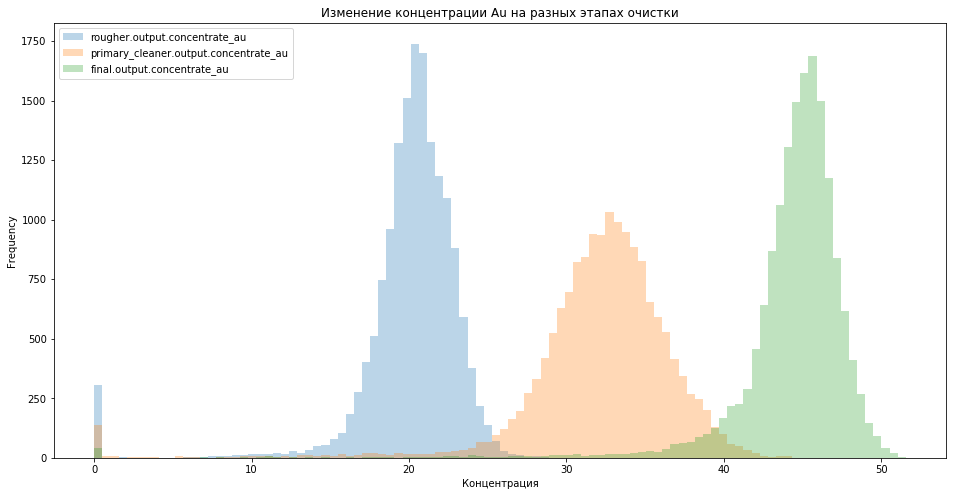

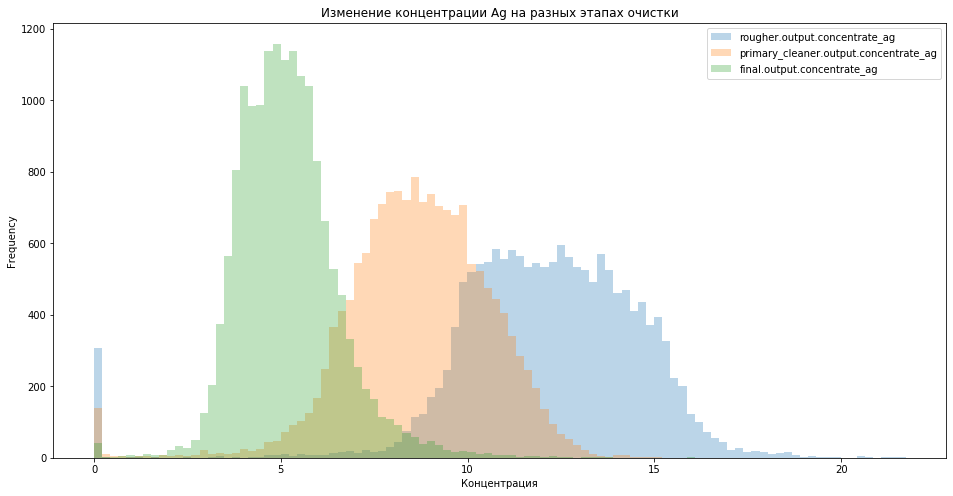

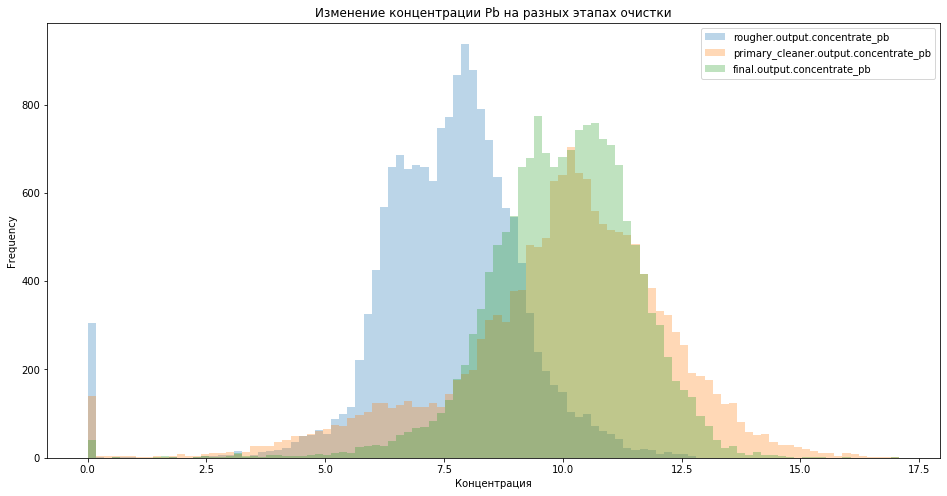

In [16]:
# Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
# Чтобы быть более точными, будем смотреть на полном наборе данных со сброшенными пустыми значениями
ag_list = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
au_list = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']
pb_list = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']

metall_dict = {"Au": au_list, "Ag": ag_list, "Pb": pb_list}
for key in metall_dict:
    title = 'Изменение концентрации ' + key + ' на разных этапах очистки'
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Концентрация')

    df_full_drop[metall_dict[key]].plot(kind='hist', bins=100, figsize=(16,8), ax=ax, legend=True, alpha=0.3)

## Промежуточный вывод

    1. Концентрация золота с каждым этапом растет. При чем на первичной очистке распределение охватывает более широкий диапазон.
    2. Концентрация серебра напротив убывает с каждым этапом
    3. А вот концентрация свинца также растет вместе с золотом, при чем после первичной очистки его не становится сильно меньше (уменьшается только разброс)
    4. Во всех случаях есть непонятные пики с нулевыми и околонулевыми значениями, которые уменьшаются к финальному этапу

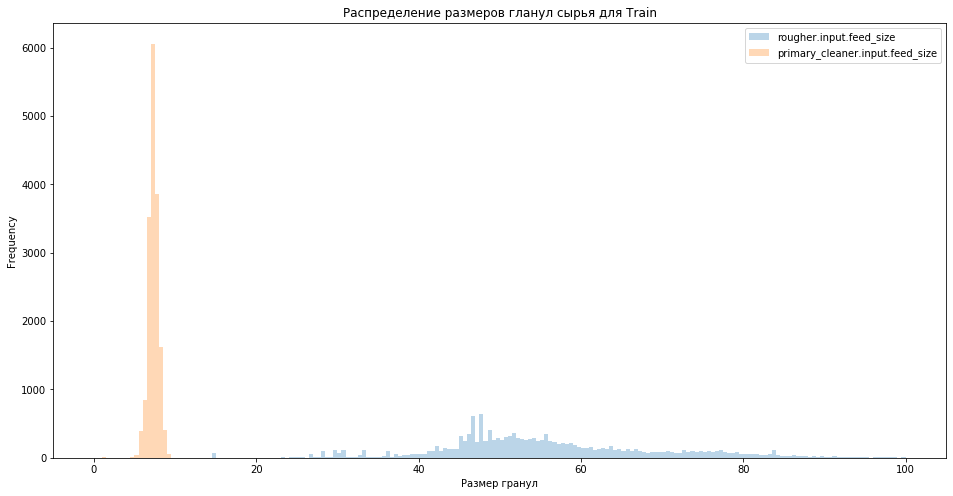

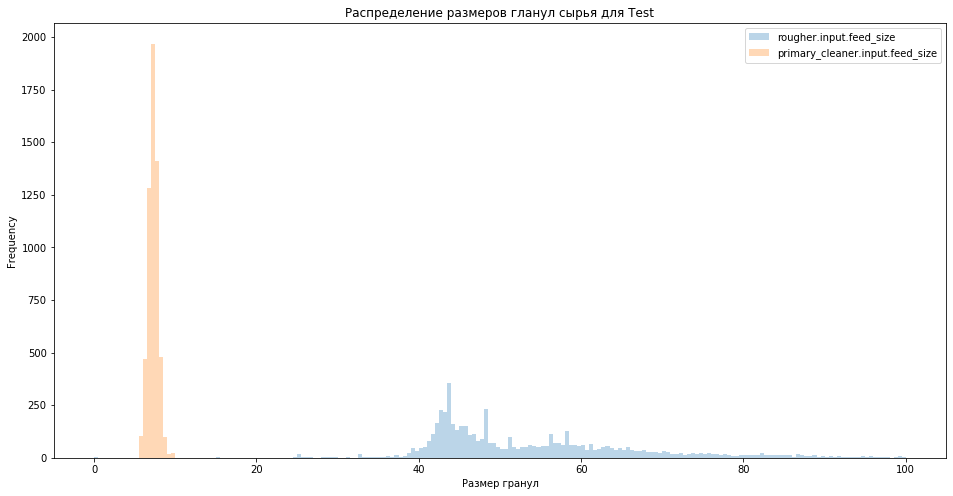

In [17]:
# Сравним распредление размеров гранул сырья

df_dict = {"Train": df_train_selected_fill, "Test": df_test}
feed_size_fields = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

for key in df_dict:
    df = df_dict[key]
    title = 'Распределение размеров гланул сырья для ' + key
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Размер гранул')

    df[feed_size_fields].plot(kind='hist', bins=200, range=(0,100), figsize=(16,8), ax=ax, legend=True, alpha=0.3)

## Промежуточный вывод

    Распределения размеров гранул на обучающей и тестовой выборке сопоставимы

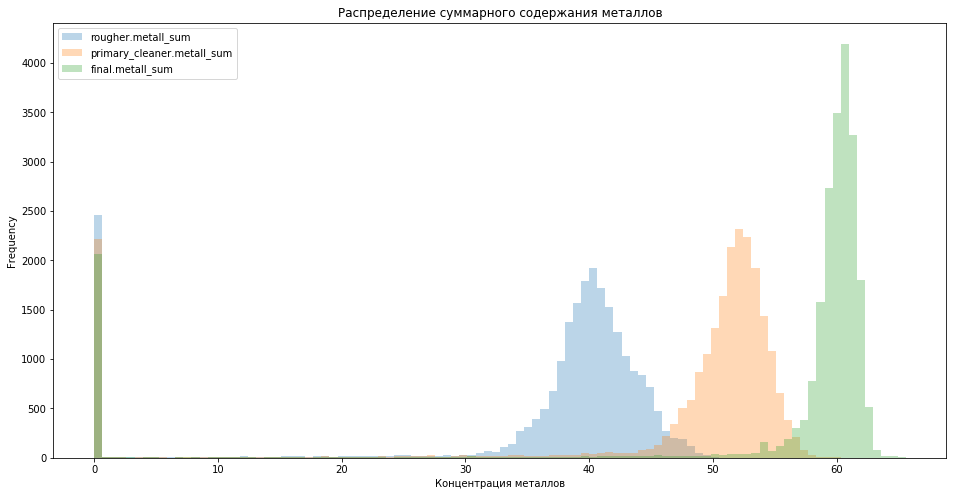

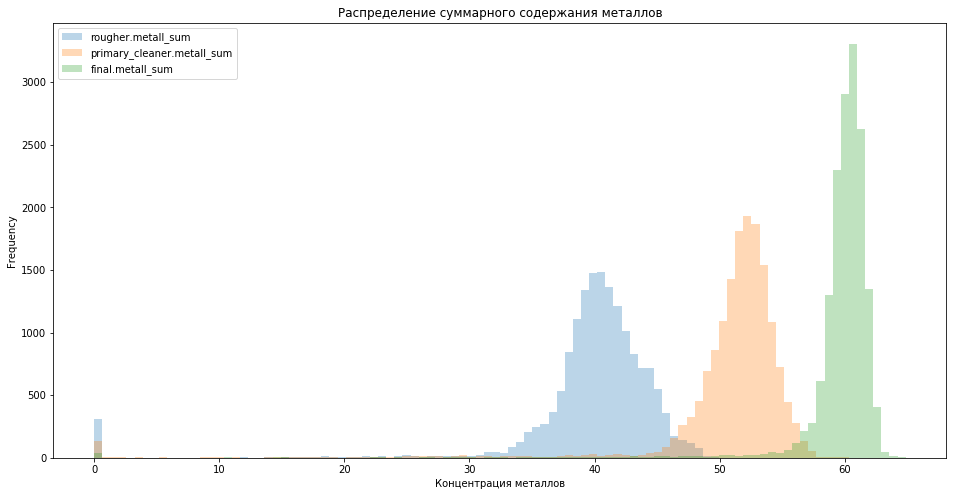

In [18]:
# Исследуем суммарную концентрацию всех веществ на разных стадиях
df_list = [df_full_fill, df_full_drop]
sum_fields = ['rougher.metall_sum', 'primary_cleaner.metall_sum', 'final.metall_sum']

for df in df_list:
    df['rougher.metall_sum'] = df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_pb']
    df['primary_cleaner.metall_sum'] = df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_au'] + df['primary_cleaner.output.concentrate_pb']
    df['final.metall_sum'] = df['final.output.concentrate_ag'] + df['final.output.concentrate_au'] + df['final.output.concentrate_pb']

    fig, ax = plt.subplots()
    ax.set_title('Распределение суммарного содержания металлов')
    ax.set_xlabel('Концентрация металлов')
    df[sum_fields].plot(kind='hist', bins=100, figsize=(16,8), ax=ax, legend=True, alpha=0.3)

## Промежуточный вывод

    1. Отчетливо видны пики на нулевых значениях, а это означает, что каждое слагаемое в замере равно нулю, из чего можно сделать вывод, что это аномалия, а не норма и такие значения стоит удалить из всех выборок.
    2. Также, в целом низкая суммарная концентрация встречается крайне редко, поэтому такие значения нам также вряд ли помогут.
    3. Отчетливо видно, что количество аномалий кратно возрастает в выборке, где мы не удаляли пустые значения. А значит все же большинство пустых значений могли означать, что концентрацию получить не удалось и она крайне мала

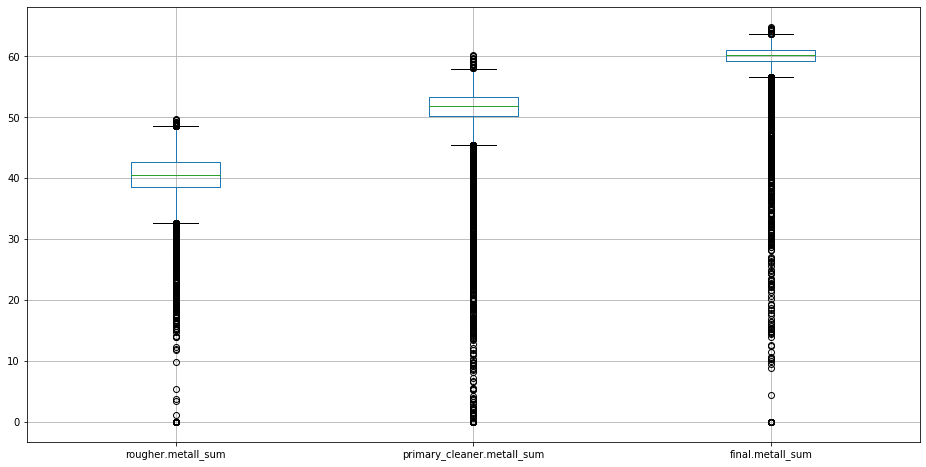

In [19]:
# Обработаем аномалии, для начала посмотрим boxplot
df_full_drop.boxplot(column=['rougher.metall_sum', 'primary_cleaner.metall_sum', 'final.metall_sum'], figsize=(16, 8))
plt.show()

In [20]:
len(df_full_fill)

22687

In [21]:
# Добавим функцию, которая оставит только нормальные значения (по границам boxplot'a)
def trim_by_boxplot_borders(df, column):
    _, bp = pd.DataFrame.boxplot(df[column], return_type='both')
    plt.close('all')
    whiskers = [whiskers.get_ydata() for whiskers in bp['whiskers']]
    bottom_boundary = whiskers[0][1]
    top_boundary = whiskers[1][1]

    return df[(df[column] < top_boundary) & (df[column] > bottom_boundary)]

# в ходе проверок, отсечение хвостов целиком приходит к потере почти 25% данных, что может сказаться на эффективности модели.
# поэтому подберем границы вручную
df_full_fill = df_full_fill[df_full_fill['rougher.metall_sum'] > 12]
df_full_fill = df_full_fill[df_full_fill['primary_cleaner.metall_sum'] > 12]
df_full_fill = df_full_fill[df_full_fill['final.metall_sum'] > 20]

# посмотрим насколько все изменилось
len(df_full_fill)

19388

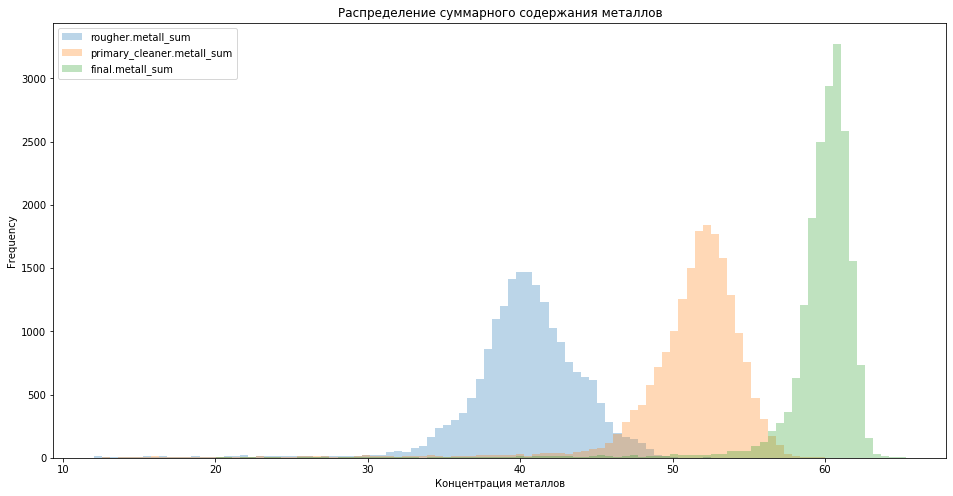

In [22]:
# Посмотрим график
fig, ax = plt.subplots()
ax.set_title('Распределение суммарного содержания металлов')
ax.set_xlabel('Концентрация металлов')
df_full_fill[sum_fields].plot(kind='hist', bins=100, figsize=(16,8), ax=ax, legend=True, alpha=0.3)

In [23]:
len(df_test)

5856

In [24]:
# оставим в трейне соответствующие записи
df_train_selected_fill = df_train_selected_fill[df_train_selected_fill.index.isin(df_full_fill.index)]
# по согласованию с преподавателем уберем также аномалии из теста
df_test = df_test[df_test.index.isin(df_full_fill.index)]
df_test = df_test.dropna()

len(df_train_selected_fill)

14176

In [25]:
len(df_test)

5141

In [26]:
df_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


# Вывод

    1. Мы проанализировали наши данные и посмотрели как менятся концентрации металов на различных этапах очистки (золото и свинец растет, а серебро падает)
    2. Визуально оценили распределение размеров гранул в обучающей и тестовой выборке
    3. Исследовали суммарную концентрацию веществ на разных стадиях
    4. Удалили аномалии (правда с целью сохранить данные, сделали это в ограниченном варианте)

# 3. Модель

In [27]:
# Напишем функцию для вычисления итоговой sMAPE
def smape(target, predicted):
    result = 0
    for key in range(0, len(predicted)):
        result += abs(target[key] - predicted[key]) / ((abs(target[key]) + abs(predicted[key])) / 2)
    result = (result / len(predicted)) * 100
    
    return result

def calculate_final_smape(target_rougher, predicted_rougher, target_final, predicted_final):
    return 0.25 * smape(target_rougher, predicted_rougher) + 0.75 * smape(target_final, predicted_final)

In [28]:
# нам нужны предсказания rougher.output.recovery и final.output.recovery, но в трейне их нет
df_target = df_full_fill[df_full_fill.index.isin(df_train_selected_fill.index)][['rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.107763,70.541216
2016-01-15 01:00:00,86.843261,69.266198
2016-01-15 02:00:00,86.842308,68.116445
2016-01-15 03:00:00,87.226430,68.347543
2016-01-15 04:00:00,86.688794,66.927016


In [29]:
# Аналогично получим таргет для теста
df_test_target = df_full_fill[df_full_fill.index.isin(df_test.index)][['rougher.output.recovery', 'final.output.recovery']]
df_test_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


In [30]:
# По сути в нашем случае необходимо два признака, однако учить их на одинаковых параметрах не имеет смысла. 
# Во-первых, на результат флотации не могут влиять значения "из будущего" в виде первичной очистки
# Во-вторых, для финального результата нет смысла опираться на флотацию (ее результаты пошли как раз в первую очистку)
# Исходя из этого, нам понадобятся две разные модели и у них будут разные итоговые наборы признаков в рамках train выборки

rougher_columns = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol',
    'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
    'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
    'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level'
]

# Тут по сути правильно смотреть только на результат второй очистки, т.к. результат первой дает как раз её
# Но входные параметры определяются также на первичной очистке, поэтому добавим также и их
final_columns = [
    'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 
    'primary_cleaner.input.xanthate','primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level',
    'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 
    'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level',
    'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level',
    
    'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level',
    'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level',
    'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level',
    'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level',
    'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank4_a_level',
    'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level',
    'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level',
    'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level',
    'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level'
]

df_rougher_train = df_train_selected_fill[rougher_columns]
df_rougher_target = df_target['rougher.output.recovery']

df_final_train = df_train_selected_fill[final_columns]
df_final_target = df_target['final.output.recovery']

df_rougher_train.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
2016-01-15 01:00:00,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2016-01-15 02:00:00,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
2016-01-15 03:00:00,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
2016-01-15 04:00:00,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128


In [31]:
# В нашем случае мы имеем большое количество именно числовых признаков, исходя из чего дерево решений нам однозначно не подойдет,
# а случайный лес не позволит интерпретировать результаты вообще никак (что для цели оптимизации производства и запуска
# нового предприятия подходит плохо)

# Тем не менее, задание требует обучить несколько моделей, поэтому попробуем и лес
# Для леса нам понадобится скалировать переменные
pd.set_option('mode.chained_assignment', None)
rougher_scaler = StandardScaler()
rougher_scaler.fit(df_rougher_train[rougher_columns])
df_rougher_train[rougher_columns] = rougher_scaler.transform(df_rougher_train[rougher_columns])

final_scaler = StandardScaler()
final_scaler.fit(df_final_train[final_columns])
df_final_train[final_columns] = final_scaler.transform(df_final_train[final_columns])

# Посмотрим, что получилось
df_rougher_train.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-1.268092,-1.099882,0.506948,-0.205791,0.152625,-0.714621,0.108549,0.153554,0.146936,0.184109,...,1.537666,0.528505,1.422974,0.416748,1.842689,0.271401,1.697988,0.181700,2.161189,0.238532
2016-01-15 01:00:00,-1.237678,-1.116590,0.523176,-0.138980,-0.037499,-0.718387,0.103874,0.151653,0.189860,0.188809,...,1.525320,0.264077,1.414037,0.279688,1.850277,0.295465,1.670115,0.262721,2.066472,0.270729
2016-01-15 02:00:00,-1.260041,-1.210762,0.567239,-0.130332,0.001824,-0.776308,0.088539,0.315453,0.169436,0.322017,...,1.517566,0.263121,1.410233,0.277462,1.847041,0.295455,1.669870,0.279166,2.069872,0.263511
2016-01-15 03:00:00,-1.296670,-1.318566,0.684130,-0.119815,0.162291,-0.897780,0.000482,0.320412,0.108085,0.316429,...,1.521517,0.252511,1.411836,0.278253,1.836905,0.292297,1.679235,0.277533,2.069405,0.276532
2016-01-15 04:00:00,-1.287853,-1.540636,0.664978,-0.184891,-0.290777,-1.124008,-0.203313,0.316692,-0.088986,0.315263,...,1.522334,0.270217,1.413463,0.276027,1.846610,0.296252,1.682517,0.297871,2.074675,0.265633


In [32]:
# Поскольку мы скалировали трейн, нужно аналогичным образом поступить и с тестом
df_test[rougher_columns] = rougher_scaler.transform(df_test[rougher_columns])
df_test[final_columns] = final_scaler.transform(df_test[final_columns])

### Примечание

Код ниже закомментировал, чтобы не нужно было ждать 23 минуты (по той же причине не стал ждать пока обработаются до 100 деревьев). Вот результат и подтверждение, что параметры взяты не с потолка - https://clip2net.com/s/49jk3h3

In [33]:
# Попробуем обучить случайный лес, оценивать будем на флотации
my_scorer = make_scorer(smape, greater_is_better=False)

parameters = {'n_estimators': range(10,21,10),'max_depth': range(1,9,2), 'min_samples_leaf': range(1,7), 'min_samples_split': range(2,10,2)}

model = RandomForestRegressor()

#grid = GridSearchCV(model, parameters, cv=5, scoring=my_scorer)
#grid.fit(df_rougher_train, df_rougher_target)

#grid.best_params_

In [34]:
# Посмотрим скоринг при лучших параметрах леса, найденных через GridSearchCV

RANDOM_STATE = 12345
model_forest = RandomForestRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=RANDOM_STATE)

# Оценим модель кросс-валидацией
scores = cross_val_score(model_forest, df_rougher_train, df_rougher_target, cv=5, scoring=my_scorer)
mean_score = abs(sum(scores)/len(scores))
mean_score

7.27593490940207

In [35]:
# Посмотрим результат для флотации
model_forest.fit(df_rougher_train, df_rougher_target)
predicted_rougher = model_forest.predict(df_test[rougher_columns])

rougher_smape = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape

4.872027513198594

In [36]:
# Проверим на final
model_forest.fit(df_final_train, df_final_target)
predicted_final = model_forest.predict(df_test[final_columns])
final_smape = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape

9.408508442481276

In [37]:
# Посмотрим итоговую метрику для случайного леса
calculate_final_smape(df_test_target['rougher.output.recovery'], predicted_rougher, df_test_target['final.output.recovery'], predicted_final)

8.274388210160605

In [38]:
# Оценим линейную регрессию с помощью кросс-валидации
model_lr = LinearRegression()

scores = cross_val_score(model_lr, df_rougher_train, df_rougher_target, cv=5, scoring=my_scorer)
mean_score = abs(sum(scores)/len(scores))
mean_score

7.259421038741197

In [39]:
# Попробуем линейную регрессию (для этапа флотации)
model_lr.fit(df_rougher_train, df_rougher_target)
predicted_rougher = model_lr.predict(df_test[rougher_columns])
rougher_smape_lr = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape_lr

4.634342245312446

In [40]:
# Попробуем линейную регрессию (для финальных рассчетов)
model_lr.fit(df_final_train, df_final_target)
predicted_final = model_lr.predict(df_test[final_columns])
final_smape_lr = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape_lr

8.078439014263482

In [41]:
# Посмотрим итоговую метрику для линейной регрессии
calculate_final_smape(df_test_target['rougher.output.recovery'], predicted_rougher, df_test_target['final.output.recovery'], predicted_final)

7.217414822025724

## Промежуточный вывод

    В целом, лес и линейная регрессия показали сопоставимые результаты, но победа осталась за линейной регрессией (это даже без учета бизнес-нюансов, упомянутых ранее).
    Проверим модель на адекватность. Сравнивать будем с константной моделью

In [42]:
# проверим модель на адекватность
dummy = DummyRegressor(strategy="median")
scores = cross_val_score(dummy, df_rougher_train, df_rougher_target, cv=5, scoring=my_scorer)
mean_score = abs(sum(scores)/len(scores))
mean_score

8.238197224775664

In [43]:
# Для этапа флотации
dummy.fit(df_rougher_train, df_rougher_target)
predicted_rougher = dummy.predict(df_test[rougher_columns])
rougher_smape_dummy = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape_dummy

4.853339463386453

In [44]:
# Для финальных рассчетов
dummy.fit(df_final_train, df_final_target)
predicted_final = dummy.predict(df_test[final_columns])
final_smape_dummy = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape_dummy

8.261092672422047

In [45]:
# Наконец, итог
calculate_final_smape(df_test_target['rougher.output.recovery'], predicted_rougher, df_test_target['final.output.recovery'], predicted_final)

7.409154370163149

## Промежуточный вывод

    Не так много, как того бы хотелось, но по итогу линейная регрессия выиграла у константной модели

# Общий вывод
    Мы проделали хорошую работу для определения модели по предсказанию коэффицента восстановления золота из золотосодержащей руды.
    1. Мы изучили наши данные и убедились в корректности рассчетов эффективности обогащения
    2. Мы провели предобработку данных, попытавшись сохранить максимальное количество данных, воспользовавшись их взаимосвязью (соседние наблюдения мало отличаются друг от друга)
    3. Мы проанализировали данные и увидели как меняется концентрация металлов на разных этапах (увидели рост золота и свинца и падения серебра)
    4. Убедились, что распределения размеров гранул не сильно отличаются друг от друга
    5. Исследовали концентрацию веществ на разных стадиях и избавились от аномалий в каждой из трех выборок
    6. По итогу мы выбрали модели, обеспечивающие наименьшие значения sMAPE и итоговой оценки. В нашем случае лучшим решением оказалась линейная регрессия, хотя она и не смогла сильно превзойти константную модель.